Nombre de livres: 11

Colonnes disponibles: ['title', 'price', 'availability', 'description', 'category', 'rating', 'image_url']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         11 non-null     object
 1   price         11 non-null     object
 2   availability  11 non-null     object
 3   description   11 non-null     object
 4   category      11 non-null     object
 5   rating        11 non-null     object
 6   image_url     11 non-null     object
dtypes: object(7)
memory usage: 748.0+ bytes
Prix moyen: £39.79
Prix min: £23.21
Prix max: £56.88


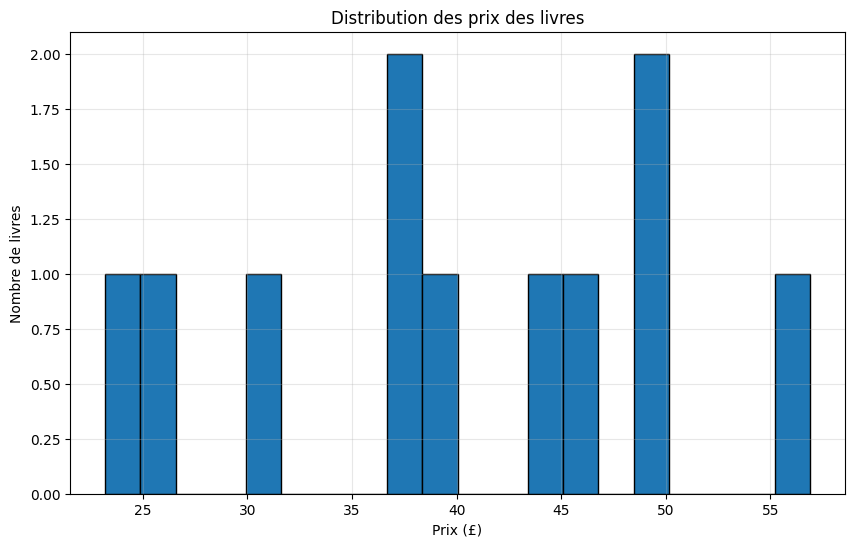


Distribution des notes:
rating
Five     1
Four     2
One      2
Three    3
Two      3
Name: count, dtype: int64


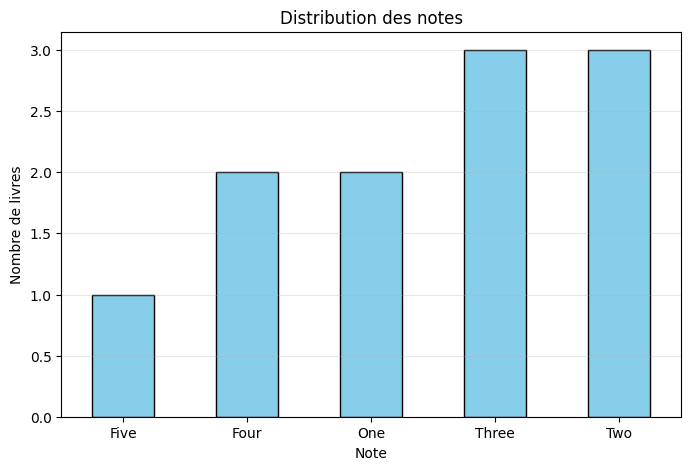


Disponibilité:
in_stock
True    11
Name: count, dtype: int64

Top 10 des livres les plus chers:
                                                title    price rating
7                    A Year in Provence (Provence #1)  Â£56.88   Four
1   Full Moon over Noahâs Ark: An Odyssey to Mou...  Â£49.43   Four
2   See America: A Celebration of Our National Par...  Â£48.87  Three
0                             It's Only the Himalayas  Â£45.17    Two
5                                  A Summer In Europe  Â£44.34    Two
9           Neither Here nor There: Travels in Europe  Â£38.95  Three
4                                Under the Tuscan Sun  Â£37.33  Three
3   Vagabonding: An Uncommon Guide to the Art of L...  Â£36.94    Two
6                            The Great Railway Bazaar  Â£30.54    One
10                 1,000 Places to See Before You Die  Â£26.08   Five

Prix moyen par note:
rating
Five     26.080000
Four     53.155000
One      26.875000
Three    41.716667
Two      42.150000
Name: pri

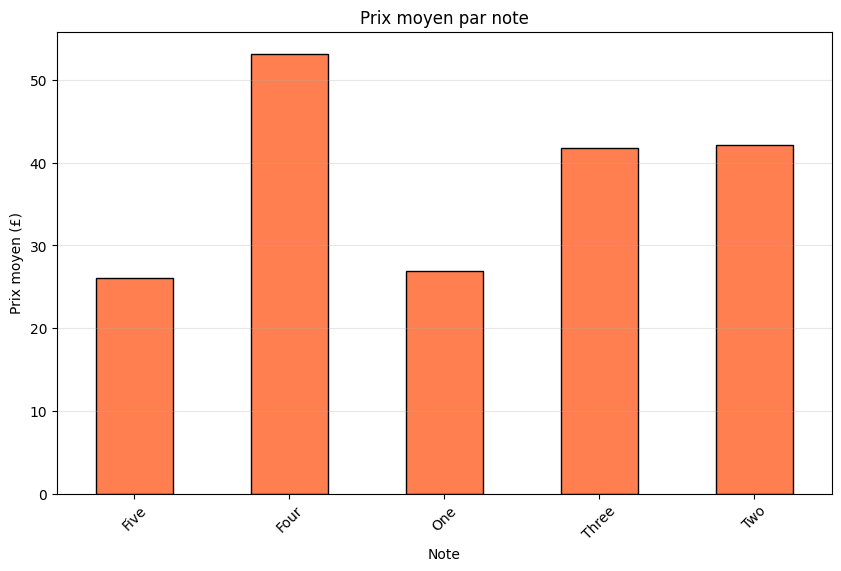

In [2]:
# Cellule 1 : Import
import pandas as pd
import matplotlib.pyplot as plt
 
# Cellule 2 : Charger les données
df = pd.read_csv("test_outputs/csv/Travel/Travel.csv")
df.head()
 
# Cellule 3 : Informations générales
print(f"Nombre de livres: {len(df)}")
print(f"\nColonnes disponibles: {list(df.columns)}")
df.info()
 
# Cellule 4 : Analyser les prix
# Nettoyer les prix (enlever le symbole £)
import re
df['price_clean'] = df['price'].str.extract(r'(\d+\.\d+)').astype(float)
 
print(f"Prix moyen: £{df['price_clean'].mean():.2f}")
print(f"Prix min: £{df['price_clean'].min():.2f}")
print(f"Prix max: £{df['price_clean'].max():.2f}")
 
# Cellule 5 : Visualiser la distribution des prix
plt.figure(figsize=(10, 6))
plt.hist(df['price_clean'], bins=20, edgecolor='black')
plt.xlabel('Prix (£)')
plt.ylabel('Nombre de livres')
plt.title('Distribution des prix des livres')
plt.grid(True, alpha=0.3)
plt.show()
 
# Cellule 6 : Analyser les notes
print("\nDistribution des notes:")
print(df['rating'].value_counts().sort_index())
 
# Graphique des notes
plt.figure(figsize=(8, 5))
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Note')
plt.ylabel('Nombre de livres')
plt.title('Distribution des notes')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.show()
 
# Cellule 7 : Analyser la disponibilité
df['in_stock'] = df['availability'].str.contains('In stock')
print("\nDisponibilité:")
print(df['in_stock'].value_counts())
 
# Cellule 8 : Top 10 livres les plus chers
print("\nTop 10 des livres les plus chers:")
top_10 = df.nlargest(10, 'price_clean')[['title', 'price', 'rating']]
print(top_10)
 
# Cellule 9 : Prix moyen par note
prix_par_note = df.groupby('rating')['price_clean'].mean().sort_index()
print("\nPrix moyen par note:")
print(prix_par_note)
 
plt.figure(figsize=(10, 6))
prix_par_note.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Note')
plt.ylabel('Prix moyen (£)')
plt.title('Prix moyen par note')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()